<a href="https://colab.research.google.com/github/CoAxLab/Data-Explorations/blob/main/book/exercises/selecting-the-best-model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 16: Model selection

This homework is designed to give you practice implementing model selection techniques, including best subset selection and forward/backward stepwise selection.

You won't need to load in any data for this homework, we will be simulating our own.

1. Best subset selection 4/4
2. Forward and backwards stepwise selection 3/3
3. Training and test error 3/3

---
## 1. Best subset selection (4 points)

In this question, we will first generate simulated data, and then use it to perform best subset selection.

a) Use `rnorm()` to generate a dataset including a predictor $X$ of length $n = 100$ and a noise vector $\epsilon$ of length $n = 100$. Generate data for a response variable $Y$ of length $n = 100$ according to the model

$Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$

where $\beta_0$, $\beta_1$, $\beta_2$, and $\beta_3$ are constants of your choice.


In [ ]:
set.seed(15)

X = rnorm(100)
e = rnorm(100)

B0 = 2
B1 = 4
B2 = 6
B3 = 8

Y = B0 + B1*X + B2*X^2 + B3*X^3 + e

b) Use `regsubsets()` to perform best subset selection to determine the best model that contains the predictor variables $X$, $X^2$, . . . , $X^{10}$. Print the model summary.

In [ ]:
# install.packages("leaps")
X2 = X^2
X3 = X^3
X4 = X^4
X5 = X^5
X6 = X^6
X7 = X^7
X8 = X^8
X9 = X^9
X10 = X^10
dat <- data.frame(Y, X, X2, X3, X4, X5, X6, X7, X8, X9, X10)
head(dat)

library(leaps)
regfit.full = regsubsets(Y ~ ., data = dat)
summary(regfit.full)

,Y,X,X2,X3,X4,X5,X6,X7,X8,X9,X10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3.5359083,0.2588229,0.06698928,0.01733836,0.004487564,0.001161484,3.006187e-04,7.780698e-05,2.013823e-05,5.212234e-06,1.349045e-06
2,78.5308701,1.8311207,3.35300302,6.13975323,11.242629238,20.586611121,3.769657e+01,6.902697e+01,1.263967e+02,2.314476e+02,4.238086e+02
3,-0.1878845,-0.3396186,0.11534077,-0.03917187,0.013303494,-0.004518113,1.534435e-03,-5.211227e-04,1.769829e-04,-6.010669e-05,2.041335e-05
4,17.6616203,0.8971982,0.80496456,0.72221273,0.647967936,0.581355646,5.215912e-01,4.679707e-01,4.198624e-01,3.766998e-01,3.379744e-01
5,7.3899404,0.4880163,0.23815989,0.11622591,0.056720135,0.027680349,1.350846e-02,6.592349e-03,3.217174e-03,1.570033e-03,7.662017e-04
6,-9.7281950,-1.2553858,1.57599356,-1.97847997,2.483755695,-3.118071682,3.914383e+00,-4.914061e+00,6.169042e+00,-7.744528e+00,9.722371e+00


Subset selection object
Call: regsubsets.formula(Y ~ ., data = dat)
10 Variables  (and intercept)
    Forced in Forced out
X       FALSE      FALSE
X2      FALSE      FALSE
X3      FALSE      FALSE
X4      FALSE      FALSE
X5      FALSE      FALSE
X6      FALSE      FALSE
X7      FALSE      FALSE
X8      FALSE      FALSE
X9      FALSE      FALSE
X10     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         X   X2  X3  X4  X5  X6  X7  X8  X9  X10
1  ( 1 ) " " " " "*" " " " " " " " " " " " " " "
2  ( 1 ) " " "*" "*" " " " " " " " " " " " " " "
3  ( 1 ) "*" "*" "*" " " " " " " " " " " " " " "
4  ( 1 ) "*" "*" "*" " " " " "*" " " " " " " " "
5  ( 1 ) "*" "*" "*" " " "*" "*" " " " " " " " "
6  ( 1 ) "*" "*" "*" " " " " "*" " " "*" " " "*"
7  ( 1 ) "*" "*" "*" "*" " " "*" " " "*" " " "*"
8  ( 1 ) "*" "*" "*" "*" "*" "*" " " "*" " " "*"

In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

c) Plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Which is the best model? Report the coefficients of the best model.

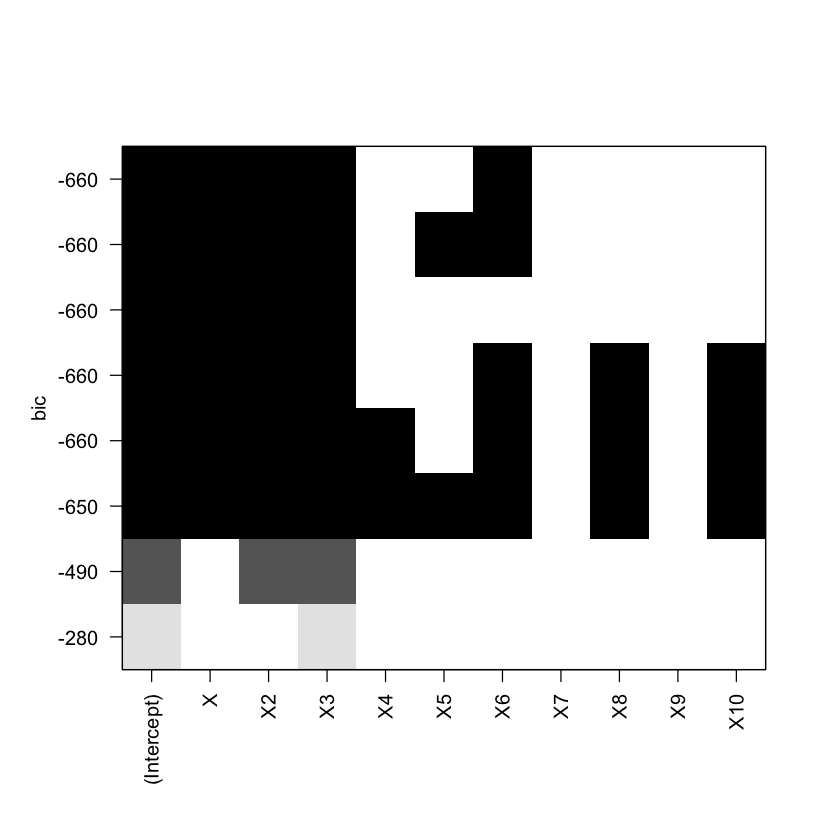

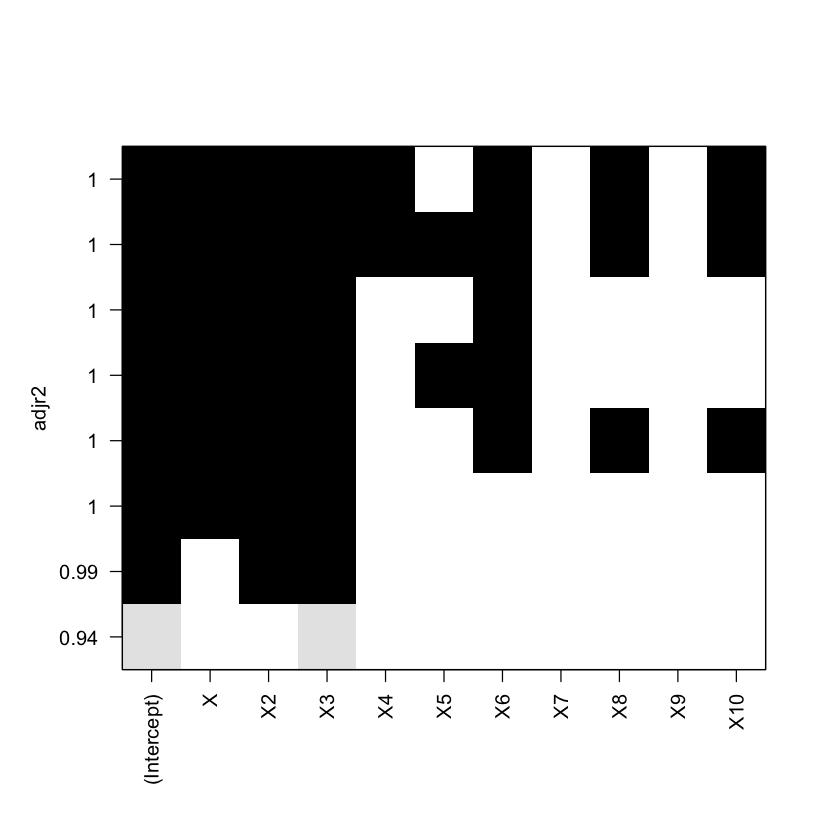

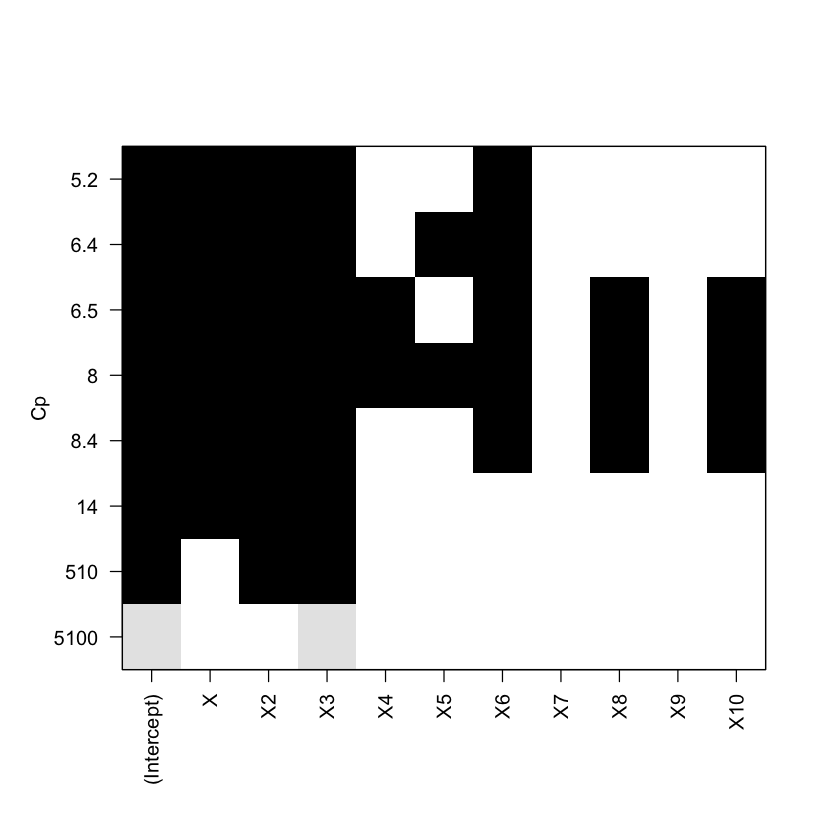

In [ ]:
plot(regfit.full, scale="bic")
plot(regfit.full, scale="adjr2")
plot(regfit.full, scale="Cp")

# the rest of the code for this question is at the code section below

In [ ]:
# identify which model has the best bias-adjusted fit
which.min(reg.summary$bic)
which.max(reg.summary$adjr2)
which.min(reg.summary$cp)

# coefficients for best model based on bic and cp
mod4 <- lm(Y ~ X + X2 + X3 + X6, data = dat)
summary(mod4)
summary(mod4)$coefficients

# coefficients for best model based on adjusted r squared
mod7 <- lm(Y ~ X + X2 + X3 + X4 + X6 + X8 + X10, data = dat)
summary(mod7)
summary(mod7)$coefficients

[1] 4

[1] 7

[1] 4


Call:
lm(formula = Y ~ X + X2 + X3 + X6, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3435 -0.6289  0.1028  0.7276  2.4280 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.569612   0.152536   10.29  < 2e-16 ***
X            4.031967   0.186485   21.62  < 2e-16 ***
X2           6.500866   0.154192   42.16  < 2e-16 ***
X3           7.990805   0.060118  132.92  < 2e-16 ***
X6          -0.017301   0.005372   -3.22  0.00175 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.058 on 95 degrees of freedom
Multiple R-squared:  0.999,	Adjusted R-squared:  0.9989 
F-statistic: 2.298e+04 on 4 and 95 DF,  p-value: < 2.2e-16


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),1.56961161,0.152535713,10.290125,3.969650e-17
X,4.03196689,0.186485445,21.620813,1.835433e-38
X2,6.50086631,0.154192301,42.160771,2.657661e-63
X3,7.99080549,0.060117502,132.919785,1.007642e-109
X6,-0.01730072,0.005372414,-3.220289,1.753567e-03



Call:
lm(formula = Y ~ X + X2 + X3 + X4 + X6 + X8 + X10, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.34476 -0.64380  0.09738  0.59793  2.43688 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.78998    0.22310   8.023 3.22e-12 ***
X            4.03229    0.18480  21.820  < 2e-16 ***
X2           4.31659    1.27187   3.394  0.00102 ** 
X3           7.99963    0.06036 132.526  < 2e-16 ***
X4           3.40354    1.71524   1.984  0.05020 .  
X6          -1.83975    0.86254  -2.133  0.03559 *  
X8           0.38471    0.17763   2.166  0.03291 *  
X10         -0.02759    0.01265  -2.180  0.03181 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.049 on 92 degrees of freedom
Multiple R-squared:  0.999,	Adjusted R-squared:  0.9989 
F-statistic: 1.338e+04 on 7 and 92 DF,  p-value: < 2.2e-16


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),1.78997778,0.22310055,8.023188,3.222606e-12
X,4.03229059,0.18480107,21.819628,3.865231e-38
X2,4.31658708,1.27186673,3.393899,1.018139e-03
X3,7.99962606,0.06036264,132.526119,7.908721e-107
X4,3.40354276,1.71523662,1.984299,5.020223e-02
X6,-1.83974566,0.86254223,-2.132934,3.559237e-02
X8,0.38471197,0.17762837,2.165825,3.291039e-02
X10,-0.02758752,0.01265488,-2.179991,3.181056e-02


> The best model based on BIC and Mallows' Cp is the model with X, X^2, X^3 and X^6, whereas the best model based on adjusted R squared is the model with X, X^2, X^3, X^4, X^6, X^8, and X^10.
> Their coefficients are reported above. The coefficients reported for the model with 4 variables are similar to the original values from simulated data, except for a very small coefficient associated with X^6. The coefficients reported for the model with 7 variables share some similarity with the original data but not as much as the 4 variable model.

---
## 2. Forward and backwards stepwise selection (3 points)

Using the same simulated data from question 1, use forward stepwise selection, and backwards stepwise selections to determine the best model. Again, for both model selection methods, plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Report the coefficients of the best model.

a) Forward stepwise selection:

Subset selection object
Call: regsubsets.formula(Y ~ ., data = dat, method = "forward")
10 Variables  (and intercept)
    Forced in Forced out
X       FALSE      FALSE
X2      FALSE      FALSE
X3      FALSE      FALSE
X4      FALSE      FALSE
X5      FALSE      FALSE
X6      FALSE      FALSE
X7      FALSE      FALSE
X8      FALSE      FALSE
X9      FALSE      FALSE
X10     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: forward
         X   X2  X3  X4  X5  X6  X7  X8  X9  X10
1  ( 1 ) " " " " "*" " " " " " " " " " " " " " "
2  ( 1 ) " " "*" "*" " " " " " " " " " " " " " "
3  ( 1 ) "*" "*" "*" " " " " " " " " " " " " " "
4  ( 1 ) "*" "*" "*" " " " " "*" " " " " " " " "
5  ( 1 ) "*" "*" "*" " " "*" "*" " " " " " " " "
6  ( 1 ) "*" "*" "*" " " "*" "*" "*" " " " " " "
7  ( 1 ) "*" "*" "*" " " "*" "*" "*" " " "*" " "
8  ( 1 ) "*" "*" "*" " " "*" "*" "*" "*" "*" " "

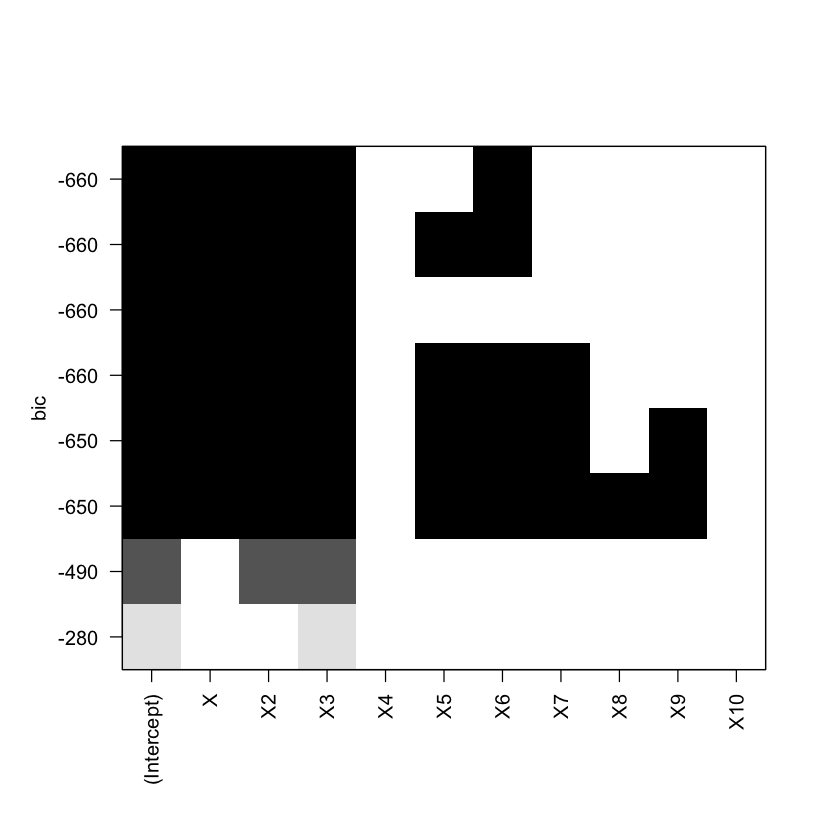

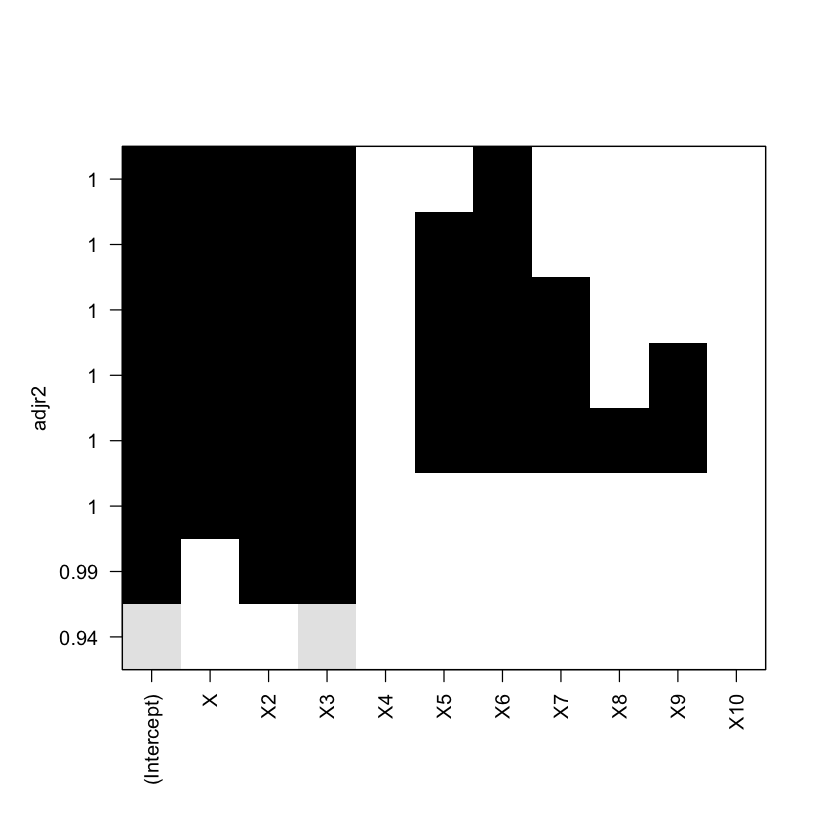

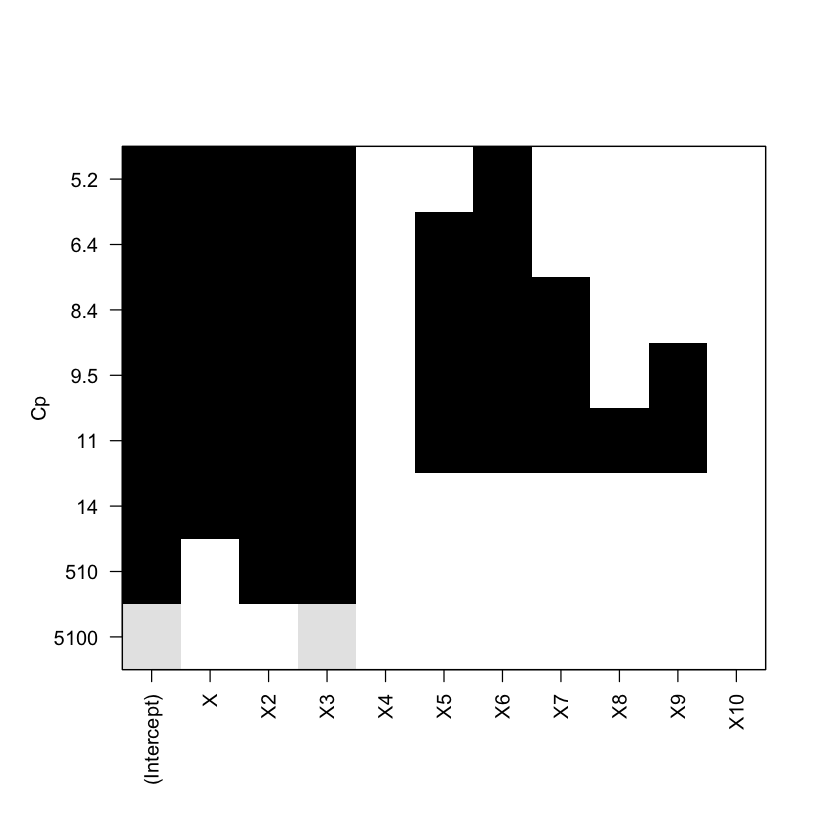

In [ ]:
regfit.forward = regsubsets(Y ~ ., data = dat, method = "forward")
summary(regfit.forward)
plot(regfit.forward, scale="bic")
plot(regfit.forward, scale="adjr2")
plot(regfit.forward, scale="Cp")

# the rest of the code for this question is at the code section below

In [ ]:
reg.summary.forward = summary(regfit.forward)
# identify which model has the best bias-adjusted fit
which.min(reg.summary.forward$bic)
which.max(reg.summary.forward$adjr2)
which.min(reg.summary.forward$cp)

# coefficients for the best model
mod4.forward <- lm(Y ~ X + X2 + X3 + X6, data = dat)
summary(mod4.forward)
summary(mod4.forward)$coefficients

[1] 4

[1] 4

[1] 4


Call:
lm(formula = Y ~ X + X2 + X3 + X6, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3435 -0.6289  0.1028  0.7276  2.4280 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.569612   0.152536   10.29  < 2e-16 ***
X            4.031967   0.186485   21.62  < 2e-16 ***
X2           6.500866   0.154192   42.16  < 2e-16 ***
X3           7.990805   0.060118  132.92  < 2e-16 ***
X6          -0.017301   0.005372   -3.22  0.00175 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.058 on 95 degrees of freedom
Multiple R-squared:  0.999,	Adjusted R-squared:  0.9989 
F-statistic: 2.298e+04 on 4 and 95 DF,  p-value: < 2.2e-16


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),1.56961161,0.152535713,10.290125,3.969650e-17
X,4.03196689,0.186485445,21.620813,1.835433e-38
X2,6.50086631,0.154192301,42.160771,2.657661e-63
X3,7.99080549,0.060117502,132.919785,1.007642e-109
X6,-0.01730072,0.005372414,-3.220289,1.753567e-03


In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

b) Backwards stepwise selection:

Subset selection object
Call: regsubsets.formula(Y ~ ., data = dat, method = "backward")
10 Variables  (and intercept)
    Forced in Forced out
X       FALSE      FALSE
X2      FALSE      FALSE
X3      FALSE      FALSE
X4      FALSE      FALSE
X5      FALSE      FALSE
X6      FALSE      FALSE
X7      FALSE      FALSE
X8      FALSE      FALSE
X9      FALSE      FALSE
X10     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: backward
         X   X2  X3  X4  X5  X6  X7  X8  X9  X10
1  ( 1 ) " " " " "*" " " " " " " " " " " " " " "
2  ( 1 ) " " "*" "*" " " " " " " " " " " " " " "
3  ( 1 ) "*" "*" "*" " " " " " " " " " " " " " "
4  ( 1 ) "*" "*" "*" " " " " "*" " " " " " " " "
5  ( 1 ) "*" "*" "*" " " " " "*" " " " " " " "*"
6  ( 1 ) "*" "*" "*" " " " " "*" " " "*" " " "*"
7  ( 1 ) "*" "*" "*" "*" " " "*" " " "*" " " "*"
8  ( 1 ) "*" "*" "*" "*" " " "*" "*" "*" " " "*"

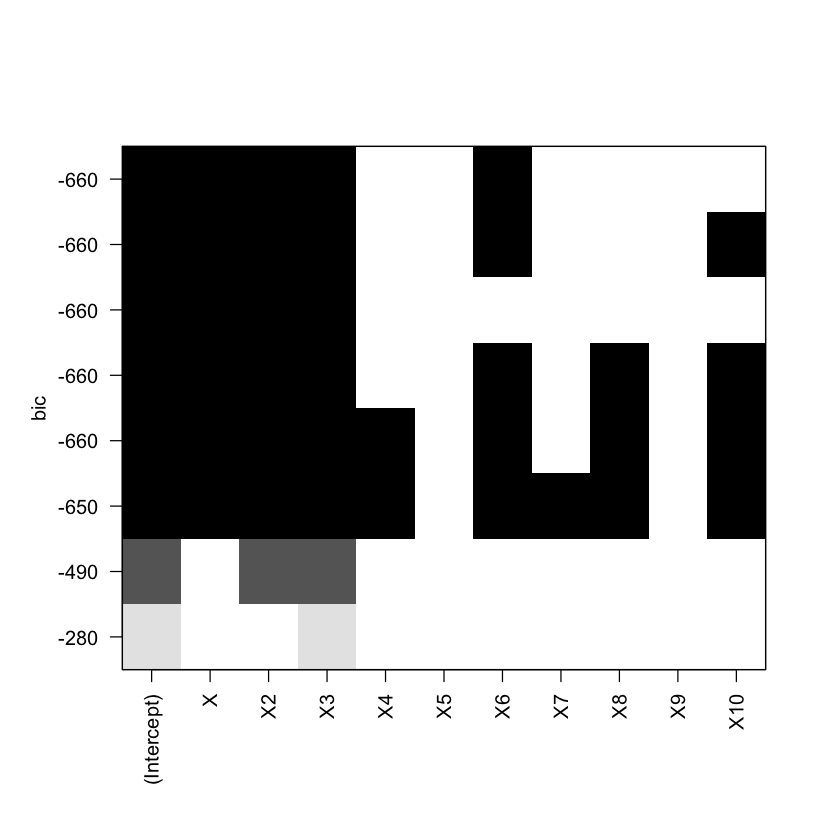

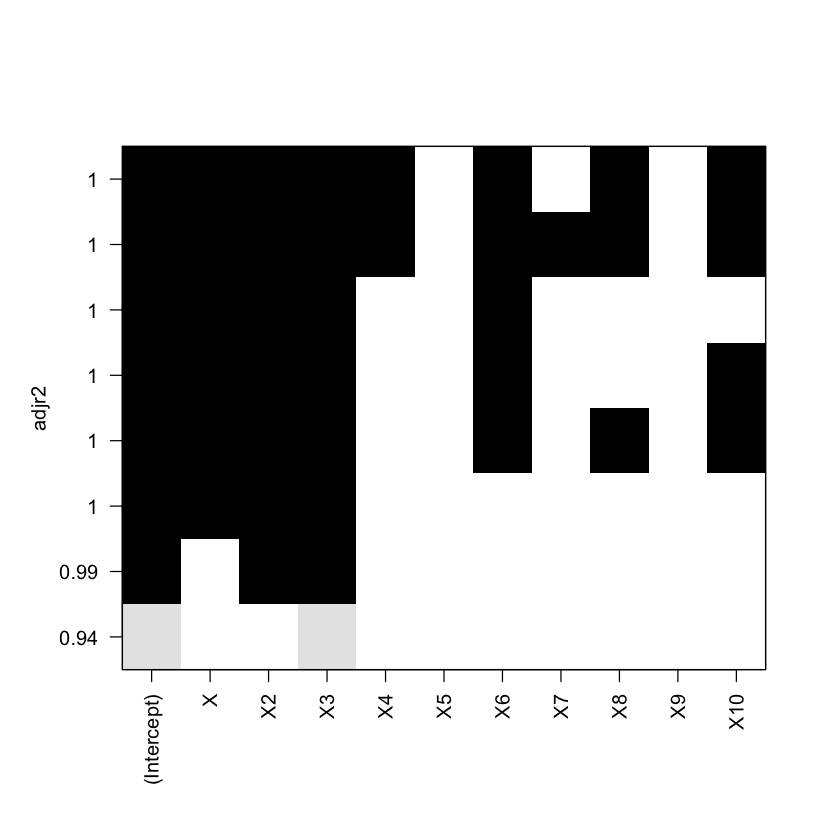

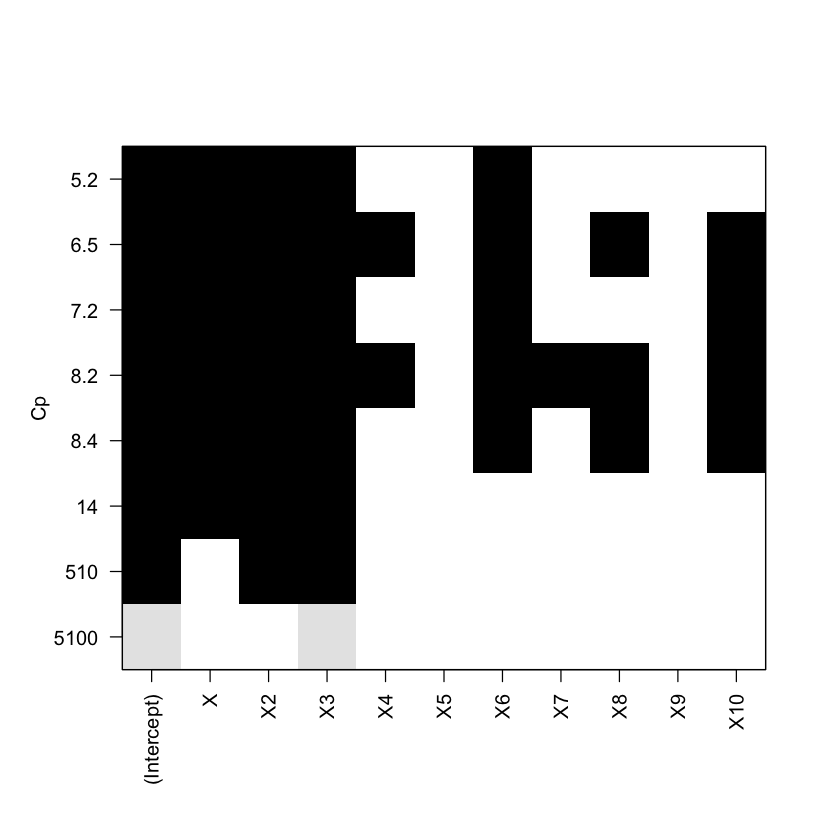

In [ ]:
regfit.backward = regsubsets(Y ~ ., data = dat, method = "backward")
summary(regfit.backward)
plot(regfit.backward, scale="bic")
plot(regfit.backward, scale="adjr2")
plot(regfit.backward, scale="Cp")

# the rest of the code for this question is at the code section below

In [ ]:
reg.summary.backward = summary(regfit.backward)
# identify which model has the best bias-adjusted fit
which.min(reg.summary.backward$bic)
which.max(reg.summary.backward$adjr2)
which.min(reg.summary.backward$cp)

# coefficients for the best model based on bic and cp
mod4.backward <- lm(Y ~ X + X2 + X3 + X6, data = dat)
summary(mod4.backward)
summary(mod4.backward)$coefficients

# coefficients for the best model based on adjusted r squared
mod7.backward <- lm(Y ~ X + X2 + X3 + X4 + X6 + X8 + X10, data = dat)
summary(mod7.backward)
summary(mod7.backward)$coefficients


[1] 4

[1] 7

[1] 4


Call:
lm(formula = Y ~ X + X2 + X3 + X6, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3435 -0.6289  0.1028  0.7276  2.4280 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.569612   0.152536   10.29  < 2e-16 ***
X            4.031967   0.186485   21.62  < 2e-16 ***
X2           6.500866   0.154192   42.16  < 2e-16 ***
X3           7.990805   0.060118  132.92  < 2e-16 ***
X6          -0.017301   0.005372   -3.22  0.00175 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.058 on 95 degrees of freedom
Multiple R-squared:  0.999,	Adjusted R-squared:  0.9989 
F-statistic: 2.298e+04 on 4 and 95 DF,  p-value: < 2.2e-16


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),1.56961161,0.152535713,10.290125,3.969650e-17
X,4.03196689,0.186485445,21.620813,1.835433e-38
X2,6.50086631,0.154192301,42.160771,2.657661e-63
X3,7.99080549,0.060117502,132.919785,1.007642e-109
X6,-0.01730072,0.005372414,-3.220289,1.753567e-03



Call:
lm(formula = Y ~ X + X2 + X3 + X4 + X6 + X8 + X10, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.34476 -0.64380  0.09738  0.59793  2.43688 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.78998    0.22310   8.023 3.22e-12 ***
X            4.03229    0.18480  21.820  < 2e-16 ***
X2           4.31659    1.27187   3.394  0.00102 ** 
X3           7.99963    0.06036 132.526  < 2e-16 ***
X4           3.40354    1.71524   1.984  0.05020 .  
X6          -1.83975    0.86254  -2.133  0.03559 *  
X8           0.38471    0.17763   2.166  0.03291 *  
X10         -0.02759    0.01265  -2.180  0.03181 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.049 on 92 degrees of freedom
Multiple R-squared:  0.999,	Adjusted R-squared:  0.9989 
F-statistic: 1.338e+04 on 7 and 92 DF,  p-value: < 2.2e-16


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),1.78997778,0.22310055,8.023188,3.222606e-12
X,4.03229059,0.18480107,21.819628,3.865231e-38
X2,4.31658708,1.27186673,3.393899,1.018139e-03
X3,7.99962606,0.06036264,132.526119,7.908721e-107
X4,3.40354276,1.71523662,1.984299,5.020223e-02
X6,-1.83974566,0.86254223,-2.132934,3.559237e-02
X8,0.38471197,0.17762837,2.165825,3.291039e-02
X10,-0.02758752,0.01265488,-2.179991,3.181056e-02


In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

c) Compare your results from parts a and b with those of question 1.

> For criterion BIC and CP, the best model (mod4) returned from forward and backward stepwise selection was the same as the full subset selection. But for critierion adjusted r squared, the best model returned from backward stepwise selection (mod7) was the same as the full subset selection, whereas the best model returned from forward stepwise selection (mod4) was the same as the model deemed best as the BIC and CP.

---
## 3. Training and test error (3 points)

This question will explore the relationship between training and test error and the number of features included in a model. We will again use a simulated dataset.

a) Simulate dataset with features $p = 20$ and observations $n = 1,000$. Generate data for a response variable $Y$ according to the model

$Y = X\beta + \epsilon$

where $\beta$ is random with some elements that are exactly zero.

Split your simulated dataset into a training set containing $n=100$ observations and a test set containing $n=900$ observations.

In [ ]:
p = 20
n = 1000

x <- matrix(rnorm(n * p), nrow = n, ncol = p)
B <- rnorm(p)
B[3] = 0
B[6] = 0
B[12] = 0
B[17] = 0
e = rnorm(p)
y = x %*% B + e

train.ind <- sample(seq(1000), 100, replace = FALSE)
x_train = x[train.ind, ]
x_test = x[-train.ind, ]
y_train = y[train.ind, ]
y_test = y[-train.ind, ]

dat_train <- data.frame(x_train, y_train)
dat_test <- data.frame(x_test, y_test)
head(dat_train)
head(dat_test)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,y_train
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.0381686,-0.4955406,0.5471216,-0.4632153,-0.2494666,0.9307846,-1.0269307,1.04194033,2.42722670,-0.51343500,...,0.1522990,1.1338036,0.32556248,1.4406080,-1.76977781,1.0639038,-1.1024092,1.2886617,-0.622206866,1.3470122
2,-1.3634698,-0.5539530,-1.0020224,-0.5005070,0.9793288,-0.6878700,0.4604994,-0.02823854,0.04788259,0.18881803,...,0.8275069,-0.5749127,-0.75815675,1.0779230,-0.80648584,1.5065812,-0.3466399,0.4388249,-0.008725975,5.3704484
3,-1.1098645,-0.8623994,-0.5667544,0.7341682,0.8709218,-0.8438570,0.5887443,-0.84791148,-0.62668384,-0.11334305,...,0.9952799,-1.5018399,-0.52323578,1.0810578,-0.03929892,-2.3763491,-1.3939541,-2.2169828,-1.756860066,0.1733193
4,0.2558066,-1.0995979,1.8313441,0.5467084,0.7159996,-1.1151484,1.3004451,1.06140308,-0.16302685,0.32226249,...,0.2268564,-0.1042224,-0.07734277,0.3019936,0.78476151,0.7692137,0.8757273,-1.2566809,-1.402674120,1.6459714
5,0.5875093,-2.2904534,0.3869029,1.6033711,0.4241716,-0.2566164,0.1335518,-0.28703398,0.11347452,-0.44684024,...,0.2718830,1.0503783,-0.06234263,2.1646731,1.08202433,-1.5024771,1.4298170,-1.4641088,-0.260123397,1.9432776
6,-0.2975921,-1.1723370,1.7976495,-0.1120368,-1.5262966,0.9680298,0.4157013,-0.19595689,1.03497033,0.09027139,...,-1.1086169,0.7955615,0.95282980,-0.7873127,0.54504591,-0.9486151,-1.0869637,-1.2288708,0.167078762,0.4086870


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,y_test
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.13128564,0.41747334,-0.547733327,1.7402467,-0.2630434,-1.0767665,-1.2646827,-0.6157973,-1.1387321,0.2716832,...,0.9717545,0.6844248,2.7890577,1.0035421,0.4536764,1.7750208,1.48567342,0.7738055,1.2775349,-0.5873269
2,0.03170881,0.23679757,0.671313700,-0.8360773,0.3841812,0.2798928,-0.1061355,0.6785184,0.8416557,-0.3959550,...,0.3185112,0.9908142,0.4990989,0.8445969,1.1474995,0.4132087,-0.20205673,1.5187755,0.2439489,-2.0542096
3,0.45119033,0.42910298,-0.628336261,1.9912295,-0.7214228,0.2664084,-2.2286249,1.3563336,0.7465802,-0.7939306,...,0.5689281,0.3111977,-2.8917003,0.7244278,1.7337642,-0.6345646,0.89079033,-1.1575207,-0.2591742,-0.9059348
4,-1.27051522,-0.87851461,0.001053965,0.7967096,-1.7254240,0.5482129,-1.4417489,-1.3891081,0.2022188,-0.2546895,...,1.2031684,0.4878709,-0.1361879,0.4419021,0.1148907,-0.2747442,-0.03942335,-2.2126200,-0.2411474,1.0403541
5,2.23620820,-0.09855832,0.404943669,-0.2211301,0.7416356,1.1613089,-0.1306495,-0.5507214,0.7935764,-1.1423575,...,-1.5163220,-0.5049098,0.9638318,-0.4621902,-0.8755713,-0.3696508,-1.84435780,0.6071741,-0.7307101,-1.6144389
6,0.87586811,-0.34720052,0.914064406,1.5773874,0.1334981,0.2821788,-1.4696047,0.7370966,1.3171762,-0.9904053,...,1.1916719,1.6830587,0.1383715,1.4685080,-1.5259733,-0.4883128,-0.70217234,0.3241826,0.1670851,2.0451727


b) Perform best subset selection on the training set, and plot the associated training and test set MSE for the best model of each size.

In [ ]:
fit_train = regsubsets(y_train ~ ., data = dat_train, nvmax = p)
train_summary = summary(fit_train)
train_summary
which.min(train_summary$bic)
which.max(train_summary$adjr2)
which.min(train_summary$cp)

Subset selection object
Call: regsubsets.formula(y_train ~ ., data = dat_train, nvmax = p)
20 Variables  (and intercept)
    Forced in Forced out
X1      FALSE      FALSE
X2      FALSE      FALSE
X3      FALSE      FALSE
X4      FALSE      FALSE
X5      FALSE      FALSE
X6      FALSE      FALSE
X7      FALSE      FALSE
X8      FALSE      FALSE
X9      FALSE      FALSE
X10     FALSE      FALSE
X11     FALSE      FALSE
X12     FALSE      FALSE
X13     FALSE      FALSE
X14     FALSE      FALSE
X15     FALSE      FALSE
X16     FALSE      FALSE
X17     FALSE      FALSE
X18     FALSE      FALSE
X19     FALSE      FALSE
X20     FALSE      FALSE
1 subsets of each size up to 20
Selection Algorithm: exhaustive
          X1  X2  X3  X4  X5  X6  X7  X8  X9  X10 X11 X12 X13 X14 X15 X16 X17
1  ( 1 )  " " "*" " " " " " " " " " " " " " " " " " " " " " " " " " " " " " "
2  ( 1 )  " " "*" " " " " "*" " " " " " " " " " " " " " " " " " " " " " " " "
3  ( 1 )  " " "*" " " " " "*" " " " " " " " " " " "*" " 

[1] 12

[1] 14

[1] 13

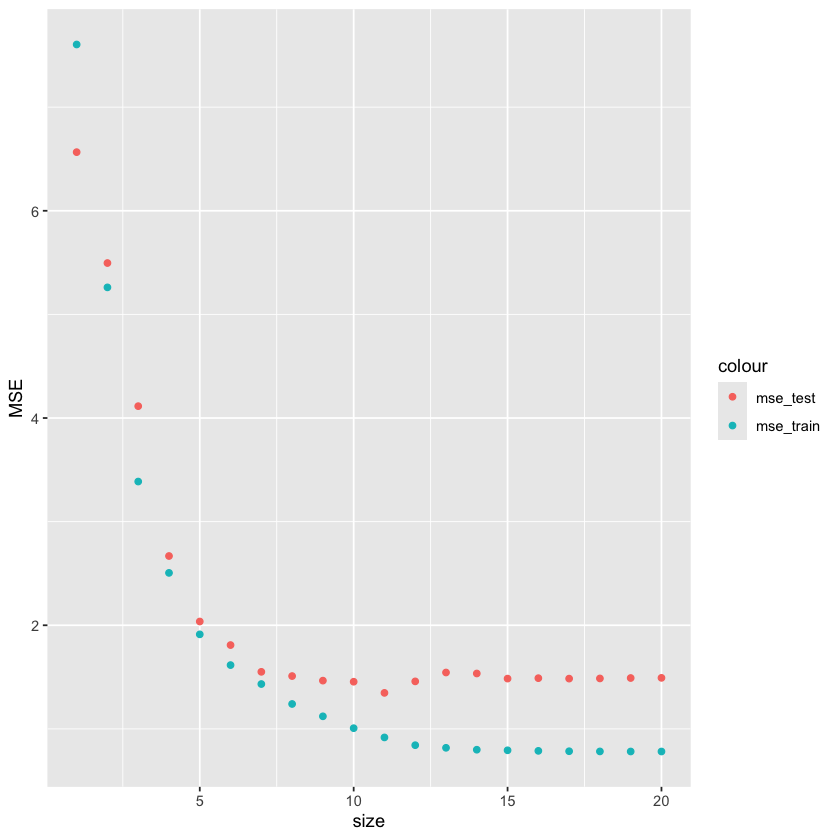

In [ ]:
train.mat = model.matrix(y_train ~ ., data = dat_train, nvmax = p)
mse_train = rep(NA, 20)
for (i in 1:20) {
    coe = coef(fit_train, id = i) # get coefficients of each variable from the best model of i size
    pred = train.mat[, names(coe)] %*% coe # calculate the predicted values
    mse_train[i] = mean((dat_train$y_train - pred)^2)
}

test.mat = model.matrix(y_test ~ ., data = dat_test, nvmax = p)
mse_test = rep(NA, 20)
for (i in 1:20) {
    coe = coef(fit_train, id = i) # get coefficients of each variable from the best model of i size
    predict = test.mat[, names(coe)] %*% coe # calculate the predicted values
    mse_test[i] = mean((dat_test$y_test - predict)^2)
}

size <- seq(1, 20)
plot_df <- data.frame(mse_train, mse_test, size)
ggplot(plot_df, aes(x = size)) +
    geom_point(aes(y = mse_train, color = "mse_train")) +
    geom_point(aes(y = mse_test, color = "mse_test")) +
    labs(y = "MSE")

c) Identify the best model according the test MSE. How does this model compare to the actual model used to simulate the dataset?

*Note: If the model identified contains only an intercept or all of the features, then generate a new dataset (i.e. repeat part a with a different random seed) until the test set MSE is minimized for an intermediate model size.*

In [ ]:
which.min(mse_test)

order <- seq(1,20)
b_dat <- data.frame(order, B)
b_dat

coef(fit_train, 11)

[1] 11

order,B
<int>,<dbl>
1,-0.41676833
2,-1.92138318
3,0.00000000
4,0.16522244
5,1.05693573
6,0.00000000
7,-0.19161374
8,0.10040126
9,0.35526659


(Intercept)          X1          X2          X5          X7          X9 
 -0.1589597  -0.5703256  -2.0716020   1.1933203  -0.3525240   0.3781897 
        X10         X11         X13         X14         X15         X20 
  0.7367788   1.1602117  -0.6080301  -0.4945408   0.3126254   1.3280308

> The best model according to the test MSE is the model with 11 predictors. When simulating the dataset, coefficients for the 3th, 6th, 12th, and 17th variables were set to 0, and the best model was correct in not containing those variables. The other coefficients are a bit off from the original simulation.

**DUE:** 5pm EST, April 7, 2025

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*